In [ ]:
"""
This code is stemming the abstracts to get a unified version of the words

"""

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from operator import itemgetter
import nltk
from nltk.collocations import *
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('ArxivMainData.csv')

In [5]:
abstracts_text = df['abstract']
abstracts = list()

In [6]:
for i in abstracts_text:
    if pd.isna(i) is False:
        abstracts.append(i)


In [8]:
snowball = SnowballStemmer(language='english')
snowball_list = list()

In [47]:

for i in abstracts:
    tokenized_abstract = word_tokenize(i)
    abstractsstimmed = [snowball.stem(word) for word in tokenized_abstract]
    snowball_list.append(abstractsstimmed)

In [ ]:
"""

Getting the frequency of conjunctions in the English language based on Google Natural Language Corpus Data: Beautiful Data

Source: http://norvig.com/ngrams/

"""

In [11]:
df2 = pd.read_csv('wordsFrequenct.csv')

In [12]:
df2

,the,23135851162
0,of,13151942776
1,and,12997637966
2,to,12136980858
3,a,9081174698
4,in,8469404971
...,...,...
333327,gooek,12711
333328,gooddg,12711
333329,gooblle,12711
333330,gollgo,12711


In [86]:
#lists of the used conjunctions

addition = [snowball.stem("additionally"),snowball.stem("also"),snowball.stem("besides"),snowball.stem("furthermore"),snowball.stem("moreover")]
consuequence = [snowball.stem("consequently"),snowball.stem("accordingly"),snowball.stem("so"),snowball.stem("therfore"),snowball.stem("thus")]
comparison = [snowball.stem("alternatively"),snowball.stem("similarly"),snowball.stem("likewise")]
contrast = [snowball.stem("however"),snowball.stem("nevertheless"),snowball.stem("otherwise"),snowball.stem("conversely")]
emphasis = [snowball.stem("certainly"),snowball.stem("definitely"),snowball.stem("indeed")]
clarification = [snowball.stem("example"),snowball.stem("instance"),snowball.stem("namely"),snowball.stem("notably")]

In [87]:
#initiating the dictionary that will carry the count of the conjunctions frequency in the abstracts

conjuntion = {"addition":0, "consuequence":0, "comparison":0,"contrast":0,"emphasis":0,"clarification":0}

In [89]:
#initiating the dictionary that will carry the count of the conjunctions frequency in the English Language

conjuntionGeneral = {"addition":0, "consuequence":0, "comparison":0,"contrast":0,"emphasis":0,"clarification":0}

In [121]:
conjuntionPure = {"addition":0, "consuequence":0, "comparison":0,"contrast":0,"emphasis":0,"clarification":0}

In [90]:
# This dict will store the frequency of the the conjunctions words in English 


frequency = {}

In [91]:
Conjunctions_List = [addition,consuequence,comparison,contrast,emphasis,clarification]

In [92]:
#Initializing the variables to zero

for i in Conjunctions_List:
    for j in i:
        frequency[j] = 0

In [93]:
#get the frequency of the conjunctions in English

for i in range(len(df2['the'])):
    try:
        word = snowball.stem(df2['the'][i])
        if word in frequency:
            frequency[word] += int(df2['23135851162'][i])
    except:
        print(i,word)

2576 height
12818 carat


In [94]:
frequency

{'addit': 230486991,
 'also': 616829742,
 'besid': 17789660,
 'furthermor': 11462067,
 'moreov': 11797770,
 'consequ': 27619593,
 'accord': 113387336,
 'so': 661809559,
 'therfor': 75810,
 'thus': 59447388,
 'altern': 91466674,
 'similar': 136929021,
 'likewis': 5568135,
 'howev': 164000564,
 'nevertheless': 8618447,
 'otherwis': 53406486,
 'convers': 55262692,
 'certain': 100420460,
 'definit': 89517496,
 'inde': 26943016,
 'exampl': 169394769,
 'instanc': 34910334,
 'name': 581760667,
 'notabl': 8946244}

In [96]:
#Calculating the conjunctions relative frequency [to each others] in English
relativefreq = {}

In [97]:
sum = 0
for i in frequency:
    sum += frequency[i]
for i in frequency:
    relativefreq[i] = frequency[i]/sum

In [98]:
for j in relativefreq:
    if j in addition:
        conjuntionGeneral["addition"] += relativefreq[j]
    if j in consuequence:
        conjuntionGeneral["consuequence"] += relativefreq[j]
    if j in comparison:
        conjuntionGeneral["comparison"] += relativefreq[j]
    if j in contrast:
        conjuntionGeneral["contrast"] += relativefreq[j]
    if j in emphasis:
        conjuntionGeneral["emphasis"] += relativefreq[j]
    if j in clarification:
        conjuntionGeneral["clarification"] += relativefreq[j]

In [174]:
sum = 0
for i in conjuntionGeneral:
    sum += conjuntionGeneral[i]
for i in conjuntionGeneral:
    conjuntionGeneral[i] = conjuntionGeneral[i]/sum

Text(0, 0.5, 'Relative Frequency')

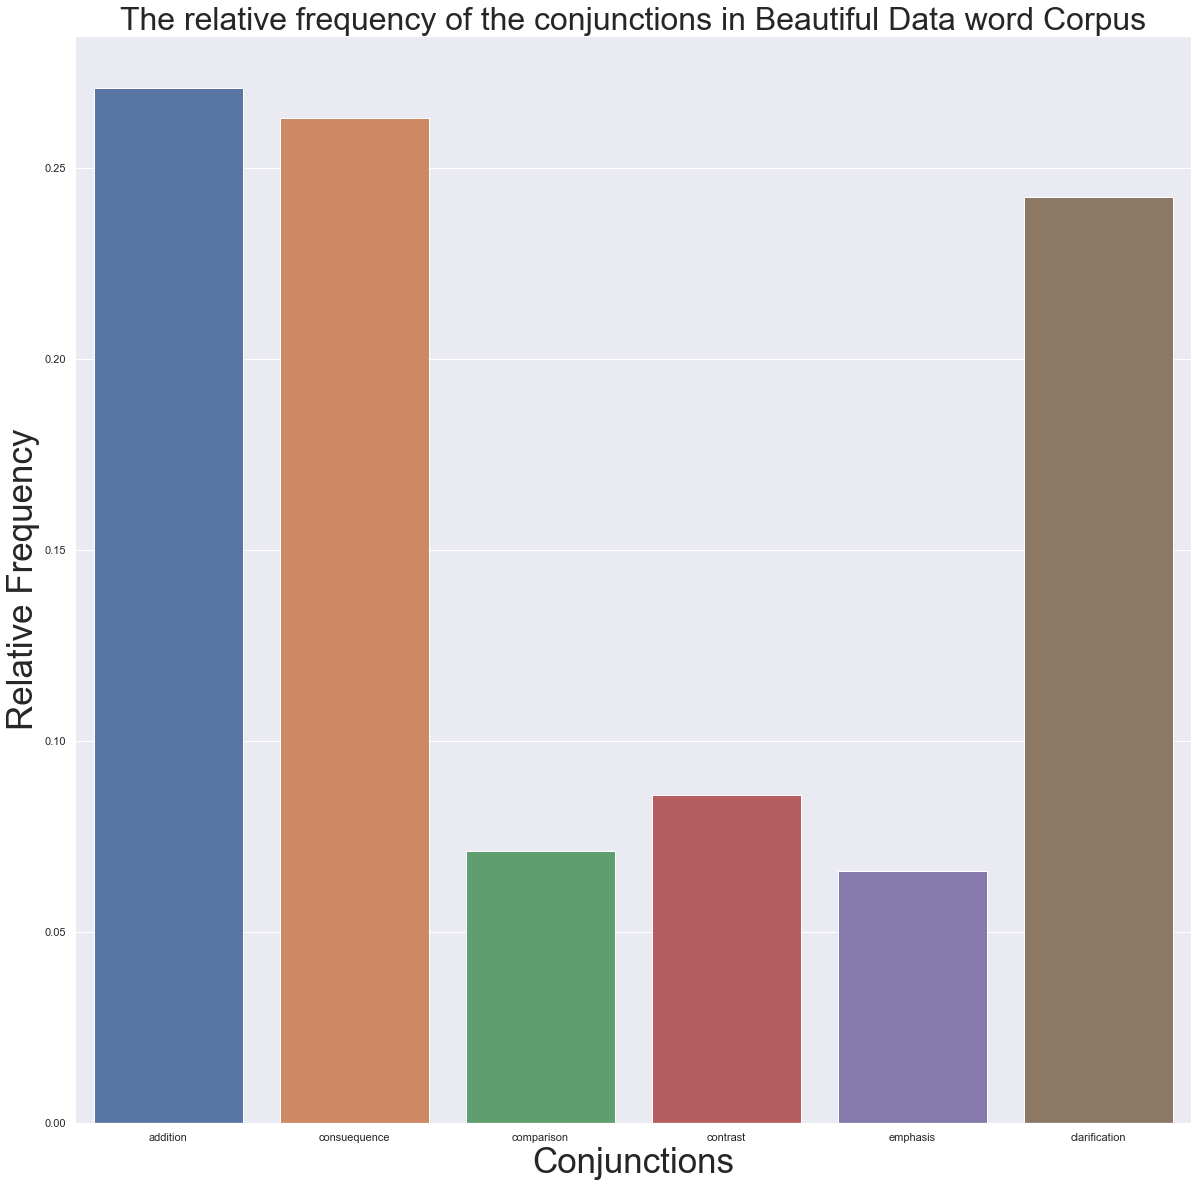

In [194]:
a = sns.barplot(x=list(conjuntionGeneral.keys()), y=list(conjuntionGeneral.values()))
sns.set(rc={'figure.figsize':(20,20)})
a.set_title("The relative frequency of the conjunctions in Beautiful Data word Corpus", fontsize = 32)
a.set_xlabel("Conjunctions", fontsize = 35)
a.set_ylabel("Relative Frequency", fontsize = 35)


In [83]:
relativefreq

{'addit': 0.07031649594658304,
 'also': 0.1881811457770077,
 'besid': 0.005427232790249279,
 'furthermor': 0.003496823765402722,
 'moreov': 0.003599239344418007,
 'consequ': 0.008426128480417246,
 'accord': 0.034591974660460774,
 'so': 0.20190349559829784,
 'therfor': 2.312795847862173e-05,
 'thus': 0.018136086549617673,
 'altern': 0.02790446429824073,
 'similar': 0.04177402337694662,
 'likewis': 0.0016987151442205569,
 'howev': 0.05003295389345134,
 'nevertheless': 0.0026292980393906084,
 'otherwis': 0.016293140623889892,
 'convers': 0.01685942812284476,
 'certain': 0.030636066868277197,
 'definit': 0.027309813093235547,
 'inde': 0.008219719764369356,
 'exampl': 0.05167860683191821,
 'instanc': 0.010650372711077912,
 'name': 0.17748234468897617,
 'i.e.': 0.0,
 'notabl': 0.0027293016722281863}

In [100]:
for i in snowball_list:
    for j in i:
        if j in addition:
            conjuntion["addition"] += float(1)/float(relativefreq[j])
        if j in consuequence:
            conjuntion["consuequence"] += float(1)/float(relativefreq[j])
        if j in comparison:
            conjuntion["comparison"] += float(1)/float(relativefreq[j])
        if j in contrast:
            conjuntion["contrast"] += float(1)/float(relativefreq[j])
        if j in emphasis:
            conjuntion["emphasis"] += float(1)/float(relativefreq[j])
        if j in clarification:
            conjuntion["clarification"] += float(1)/float(relativefreq[j])

In [169]:
sum = 0
for i in conjuntion:
    sum += conjuntion[i]
for i in conjuntion:
    conjuntion[i] = conjuntion[i]/sum

In [170]:
conjuntion

{'addition': 0.5023554820711617,
 'consuequence': 0.1555694322207286,
 'comparison': 0.06198920120504248,
 'contrast': 0.12581553701978532,
 'emphasis': 0.053512312631447824,
 'clarification': 0.100758034851834}

Text(0, 0.5, 'Relative Frequency in our word corpus/Relative Frequency in Beautiful Data Word Corpus')

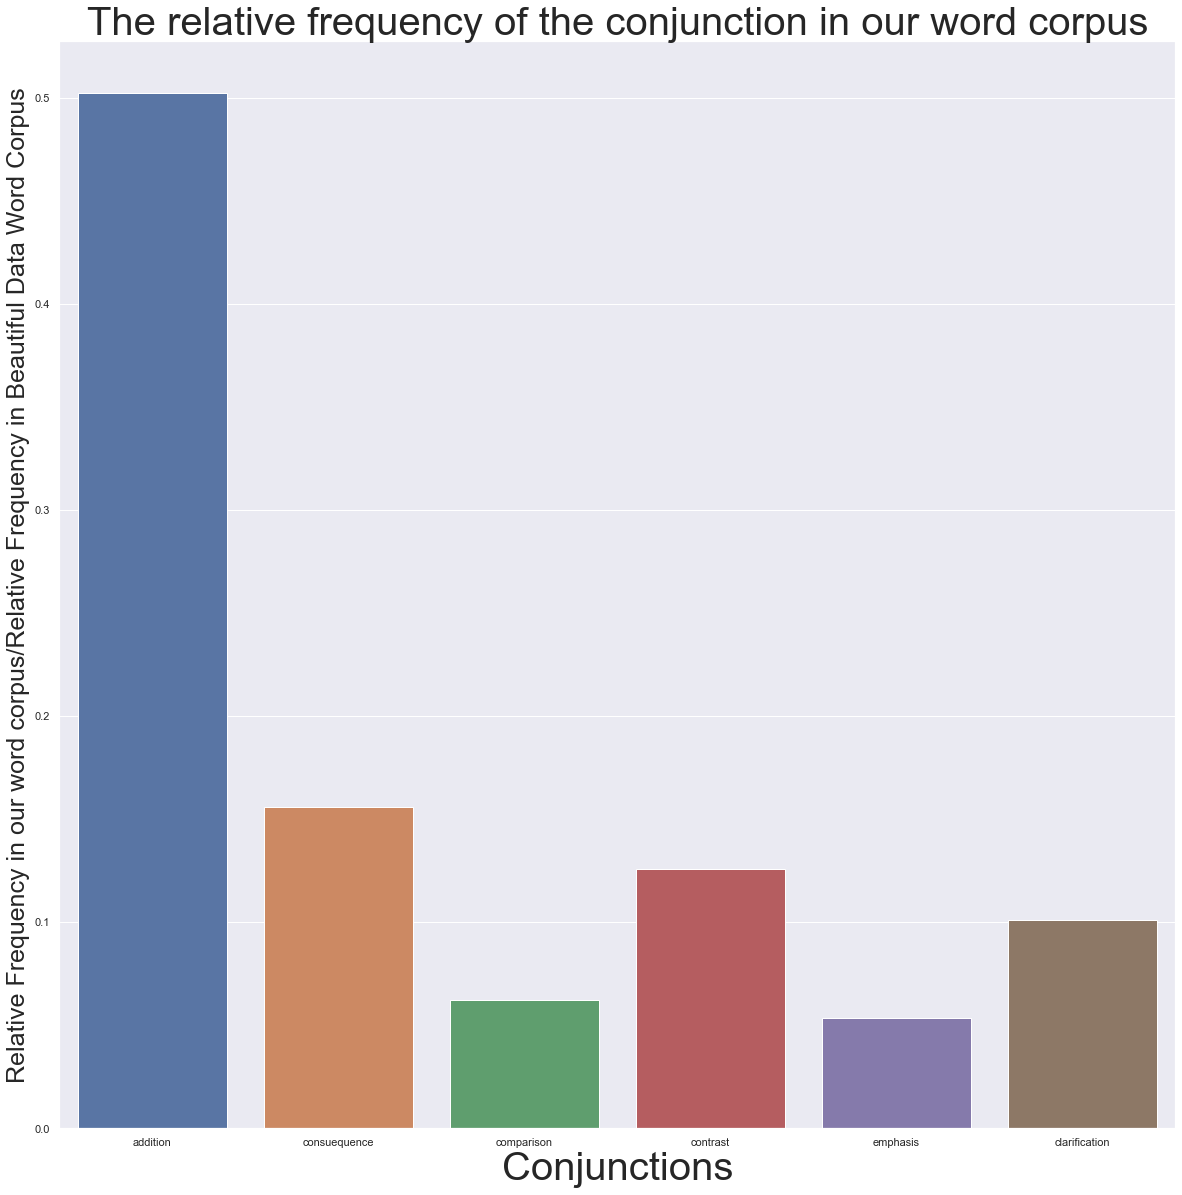

In [193]:
f, ax = plt.subplots()
ax.ticklabel_format(style='plain', axis='both')
a = sns.barplot(x=list(conjuntion.keys()), y=list(conjuntion.values()))
sns.set(rc={'figure.figsize':(20,20)})
a.set_title("The relative frequency of the conjunction in our word corpus", fontsize = 40)
a.set_xlabel("Conjunctions", fontsize = 40)
a.set_ylabel("Relative Frequency in our word corpus/Relative Frequency in Beautiful Data Word Corpus", fontsize = 25)


In [122]:
for i in snowball_list:
    for j in i:
        if j in addition:
            conjuntionPure["addition"] += 1
        if j in consuequence:
            conjuntionPure["consuequence"] += 1
        if j in comparison:
            conjuntionPure["comparison"] += 1
        if j in contrast:
            conjuntionPure["contrast"] += 1
        if j in emphasis:
            conjuntionPure["emphasis"] += 1
        if j in clarification:
            conjuntionPure["clarification"] += 1

In [172]:
sum = 0
for i in conjuntionPure:
    sum += conjuntionPure[i]
for i in conjuntionPure:
    conjuntionPure[i] = conjuntionPure[i]/sum

Text(0, 0.5, 'Relative Frequency')

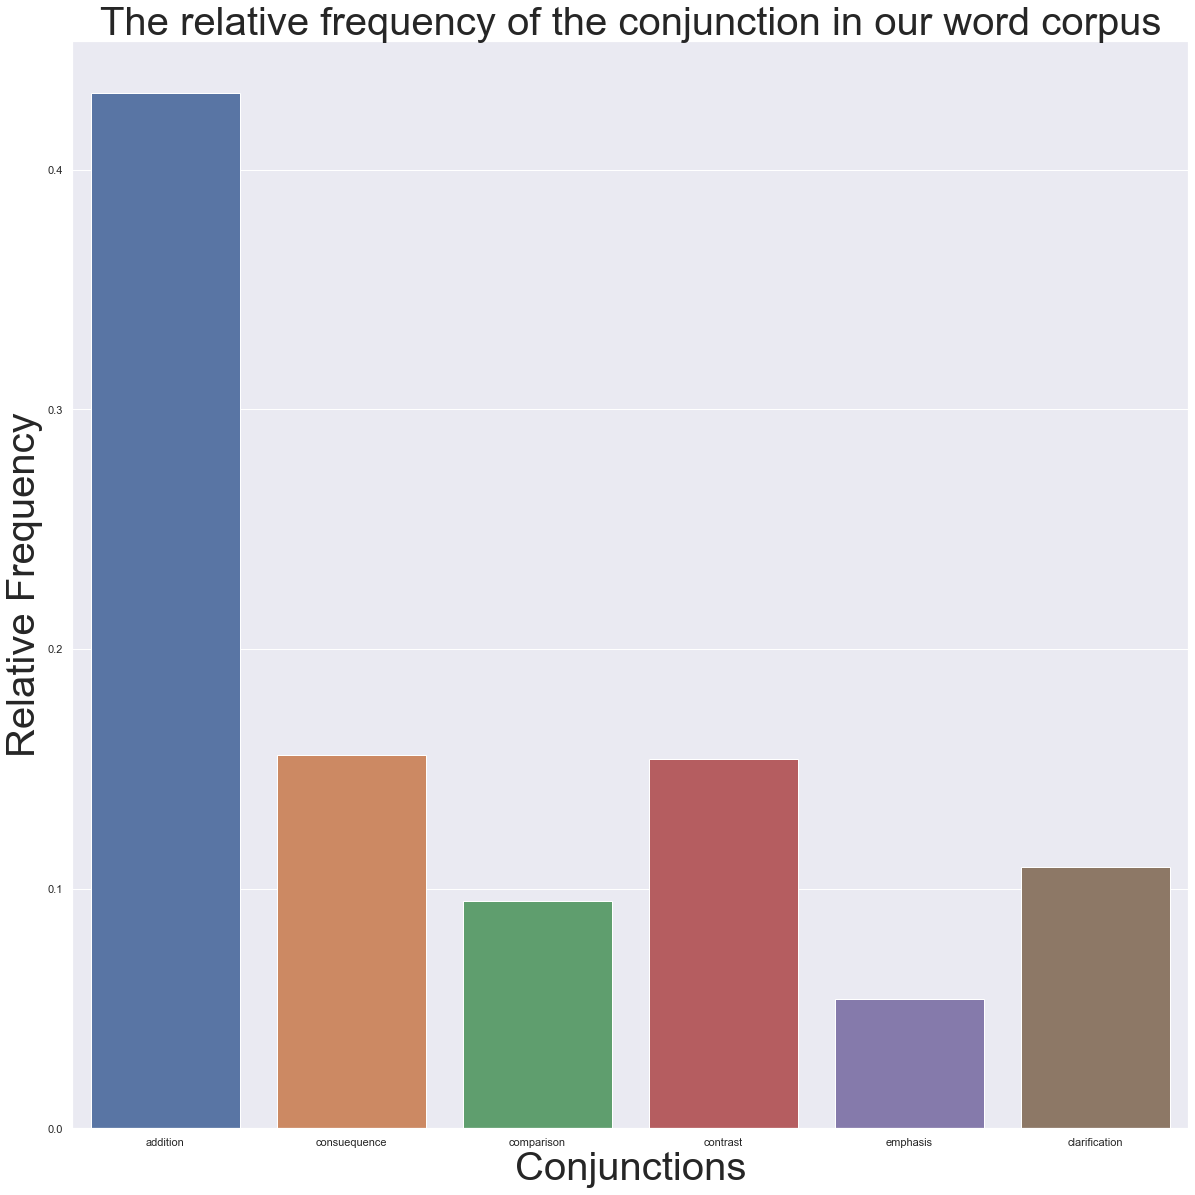

In [186]:
f, ax = plt.subplots()
ax.ticklabel_format(style='plain', axis='both')
a = sns.barplot(x=list(conjuntionPure.keys()), y=list(conjuntionPure.values()))
sns.set(rc={'figure.figsize':(20,20)})
a.set_title("The relative frequency of the conjunction in our word corpus", fontsize = 40)
a.set_xlabel("Conjunctions", fontsize = 40)
a.set_ylabel("Relative Frequency", fontsize = 40)

In [ ]:
#TFIDF Analysis

In [5]:
TFIDF_list = {}
TFIDF_words = {}

In [6]:
tfIdfVectorizer=TfidfVectorizer(use_idf=True)
tfIdf = tfIdfVectorizer.fit_transform(abstracts)

In [7]:
for  i in range(len(abstracts)):
    try:
        print(i)
        if i%1000 == 0:
            print(i)
            df3 = pd.DataFrame(TFIDF_list.items(), columns=['Word', 'Value'])
            df3.to_csv('TFIDF5.csv',index=False)
            df4 = pd.DataFrame(TFIDF_words.items(), columns=['Word', 'Frequency'])
            df4.to_csv('TFIDF_frequency5.csv',index=False)
        df2 = pd.DataFrame(tfIdf[i].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
        df2 = df2.sort_values('TF-IDF', ascending=False)
        for i in range(5):
            if df2.index[i] not in TFIDF_list:
                TFIDF_list[df2.index[i]] = df2['TF-IDF'][i]
                TFIDF_words[df2.index[i]] = 1
            else:
                TFIDF_list[df2.index[i]] = TFIDF_list[df2.index[i]] + df2['TF-IDF'][i]
                TFIDF_words[df2.index[i]] += 1
    except:
        print("error", i)

0


c:\Users\AhmedHassanOsmanIbra\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
error 63347
64000


In [15]:
df3

,Word,Value
0,conversion,2.160699
1,fes2,0.272284
2,polydisperse,0.434667
3,material,2.105615
4,intercalation,0.194777
...,...,...
14752,explosive,0.108007
14753,n_k,0.106675
14754,inside,0.103173
14755,substantial,0.131726


In [9]:
TFIDF_LIST = sorted(TFIDF_list.items(), key=itemgetter(1), reverse=True)

In [10]:
TFIDF_LIST

[('the', 285.8405935835421),
 ('of', 114.72328868872803),
 ('quantum', 43.265620868068716),
 ('and', 30.53592026781956),
 ('in', 21.613997492476457),
 ('to', 18.03830373178998),
 ('spin', 13.650510822080262),
 ('states', 11.852401565601257),
 ('phase', 11.445333046164087),
 ('magnetic', 11.268564932402821),
 ('model', 10.96873352723561),
 ('topological', 10.180621824834159),
 ('black', 9.905383140188748),
 ('we', 9.83145165759925),
 ('gravity', 9.449615613959683),
 ('time', 9.082531462712964),
 ('network', 8.856395861019617),
 ('entanglement', 8.652963429441483),
 ('laser', 8.63084923133508),
 ('flow', 8.555022140812756),
 ('electron', 8.438589025520914),
 ('method', 8.285618726294054),
 ('boundary', 8.282776179349366),
 ('dark', 8.029682439640396),
 ('field', 8.005332134977593),
 ('gauge', 7.714732057168017),
 ('optical', 7.610837516616824),
 ('symmetry', 7.583437497937118),
 ('axion', 7.518390487605448),
 ('models', 7.513205384408176),
 ('state', 7.506981689362707),
 ('learning', 7.4

In [8]:
TFIDF_data = pd.read_csv('TFIDF5.csv')
TFIDF_data_frequency = pd.read_csv('TFIDF_frequency5.csv')

In [9]:
diction = TFIDF_data_frequency.set_index('Word').T.to_dict('list')

C:\Users\AHMEDH~1\AppData\Local\Temp/ipykernel_15384/4006138233.py:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  diction = TFIDF_data_frequency.set_index('Word').T.to_dict('list')


In [11]:
TFIDF_data

,Word,Value
0,conversion,113.159101
1,fes2,1.615563
2,polydisperse,9.418908
3,material,217.382293
4,intercalation,27.252756
...,...,...
141740,postdictions,0.277913
141741,fusioning,0.228419
141742,3nj,0.160813
141743,hyperquantization,0.160813


In [29]:
frequencyList = {}

In [33]:
for i in range(len(TFIDF_data['Word'])):
    if diction[TFIDF_data['Word'][i]][0] > 1000:
        frequencyList[TFIDF_data['Word'][i]] = TFIDF_data['Value'][i] / diction[TFIDF_data['Word'][i]]

In [34]:
Freq = sorted(frequencyList.items(), key=itemgetter(1), reverse = True)

In [35]:
for i in Freq:
    print(f"{i[0]}: {i[1][0]}")

neutrino: 0.23165929416384887
speech: 0.22668639631371745
jet: 0.22558048519441146
entanglement: 0.225557957253572
dust: 0.22260303798605982
higgs: 0.22252976592843546
graphene: 0.2224055603802762
cavity: 0.21787386232588485
bar: 0.21472395773296374
mathcal: 0.21360219756646087
dark: 0.2129252083670129
mathrm: 0.21252794613677148
phonon: 0.2103842677436072
black: 0.21025679250707321
pi: 0.20869304300462654
qubit: 0.20731585196580737
fe: 0.2060246220540885
nu: 0.20468764144342041
mathbb: 0.2036671310231703
_3: 0.20336246606016273
chiral: 0.20323449773137142
rm: 0.2023604840004836
topological: 0.19948601438880992
gauge: 0.1991236218287169
turbulence: 0.19773049563664152
radio: 0.1973673257575816
beta: 0.1968820537256404
_2: 0.19626020198841265
neutron: 0.19610965613053857
text: 0.1943814753903579
graph: 0.19337167074431078
nucleon: 0.19220208795468188
neutrinos: 0.1921972748496625
quark: 0.19103603185556595
lambda: 0.1905401201151811
galaxies: 0.1893589907942762
strain: 0.188725479956924

In [24]:
allString = str()
for i in range(len(abstracts)):
    if i % 100 == 0:
        print(i)
    allString += abstracts[i]

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [25]:
allString = nltk.wordpunct_tokenize(allString)

In [26]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()
# change this to read in your data
finder = BigramCollocationFinder.from_words(allString)



[('$$^\\', 'downarrow_'),
 (')..', 'Biweekly'),
 (')\\%.', 'Deliberately'),
 ('+))/', 'FeTOT'),
 ('+...+', 'Z_K'),
 (',...)=', '(...,'),
 ('1SWASP', 'J162545'),
 ('2GUA', '$^+$-$\\'),
 ('93mNb', 'gamas'),
 ('ARiSA', 'Compendium')]

In [ ]:
#most common phrases consisted of 2 words

In [28]:
# only bigrams that appear 3+ times
finder.apply_freq_filter(200)

# return the 10 n-grams with the highest PMI
finder.nbest(bigram_measures.pmi, 1000)

[('Generative', 'Adversarial'),
 ('United', 'States'),
 ('vice', 'versa'),
 ('Artificial', 'Intelligence'),
 ('Sloan', 'Digital'),
 ('Big', 'Bang'),
 ('Microwave', 'Background'),
 ('Magellanic', 'Cloud'),
 ('Density', 'Functional'),
 ('Digital', 'Sky'),
 ('ad', 'hoc'),
 ('Cosmic', 'Microwave'),
 ('Acoustic', 'Oscillations'),
 ('von', 'Neumann'),
 ('General', 'Relativity'),
 ('Hadron', 'Collider'),
 ('halide', 'perovskites'),
 ('Baryon', 'Acoustic'),
 ('big', 'bang'),
 ('https', 'URL'),
 ('boron', 'nitride'),
 ('Data', 'Release'),
 ('Milky', 'Way'),
 ('Dark', 'Matter'),
 ('der', 'Waals'),
 ('Sky', 'Survey'),
 ('Gaia', 'EDR3'),
 ('Functional', 'Theory'),
 ('\\"{', 'o'),
 ('Ion', 'Collider'),
 ('Markov', 'Chain'),
 ('van', 'der'),
 ('Neural', 'Networks'),
 ('Convolutional', 'Neural'),
 ('tidal', 'deformability'),
 ('$^\\', 'circ'),
 ('Large', 'Hadron'),
 ('Lyman', '-$\\'),
 ('Advanced', 'LIGO'),
 ('ab', 'initio'),
 ('\\"', 'odinger'),
 ('$^{\\', 'circ'),
 ('hexagonal', 'boron'),
 ('Machin

In [ ]:
#most common phrases consisted of 3 words

In [27]:
finder2 = TrigramCollocationFinder.from_words(allString)
scored2 = finder2.score_ngrams(trigram_measures.raw_freq)


[(',', 'and', 'the'),
 ('.', 'However', ','),
 ('.', 'In', 'the'),
 ('.', 'In', 'this'),
 ('.', 'We', 'also'),
 ('.', 'We', 'show'),
 ('In', 'this', 'paper'),
 ('as', 'well', 'as'),
 ('show', 'that', 'the'),
 ('this', 'paper', ',')]

In [33]:
print(finder2)

In [ ]:
#most common 250 phrases consisted of 2 words

In [34]:
sorted(finder2.nbest(trigram_measures.raw_freq, 250), reverse = True)

[('work', ',', 'we'),
 ('with', 'respect', 'to'),
 ('wide', 'range', 'of'),
 ('which', 'can', 'be'),
 ('well', 'as', 'the'),
 ('well', '-', 'known'),
 ('we', 'study', 'the'),
 ('we', 'show', 'that'),
 ('we', 'propose', 'a'),
 ('we', 'present', 'a'),
 ('we', 'investigate', 'the'),
 ('we', 'find', 'that'),
 ('understanding', 'of', 'the'),
 ('two', '-', 'dimensional'),
 ('to', 'study', 'the'),
 ('time', '-', 'dependent'),
 ('three', '-', 'dimensional'),
 ('this', 'work', 'we'),
 ('this', 'work', ','),
 ('this', 'paper', 'we'),
 ('this', 'paper', ','),
 ('the', 'use', 'of'),
 ('the', 'two', '-'),
 ('the', 'study', 'of'),
 ('the', 'role', 'of'),
 ('the', 'properties', 'of'),
 ('the', 'presence', 'of'),
 ('the', 'performance', 'of'),
 ('the', 'other', 'hand'),
 ('the', 'number', 'of'),
 ('the', 'non', '-'),
 ('the', 'magnetic', 'field'),
 ('the', 'low', '-'),
 ('the', 'impact', 'of'),
 ('the', 'framework', 'of'),
 ('the', 'formation', 'of'),
 ('the', 'first', 'time'),
 ('the', 'existence', '

In [30]:
sorted(finder2.nbest(trigram_measures.raw_freq, 100))

[('$', '_', '{'),
 ('$', '_2', '$'),
 (',', 'and', 'the'),
 (',', 'as', 'well'),
 (',', 'i', '.'),
 (',', 'in', 'the'),
 (',', 'it', 'is'),
 (',', 'such', 'as'),
 (',', 'we', 'demonstrate'),
 (',', 'we', 'find'),
 (',', 'we', 'present'),
 (',', 'we', 'propose'),
 (',', 'we', 'show'),
 (',', 'which', 'are'),
 (',', 'which', 'is'),
 ('-', 'of', '-'),
 ('-', 'the', '-'),
 ('-', 'to', '-'),
 ('.', 'As', 'a'),
 ('.', 'Finally', ','),
 ('.', 'Furthermore', ','),
 ('.', 'Here', ','),
 ('.', 'Here', 'we'),
 ('.', 'However', ','),
 ('.', 'In', 'addition'),
 ('.', 'In', 'particular'),
 ('.', 'In', 'the'),
 ('.', 'In', 'this'),
 ('.', 'It', 'is'),
 ('.', 'Moreover', ','),
 ('.', 'Our', 'results'),
 ('.', 'The', 'results'),
 ('.', 'This', 'is'),
 ('.', 'This', 'paper'),
 ('.', 'We', 'also'),
 ('.', 'We', 'consider'),
 ('.', 'We', 'demonstrate'),
 ('.', 'We', 'discuss'),
 ('.', 'We', 'find'),
 ('.', 'We', 'investigate'),
 ('.', 'We', 'present'),
 ('.', 'We', 'propose'),
 ('.', 'We', 'show'),
 ('.',